In [4]:
#Naive Exact Matching
def naive(p,t):
  #p:read sequence
  #t:genome sequence
  occurrences=[]
  nmreads=0 #initializing number of reads to 0
  for i in range(len(t)-len(p)+1):
    match=True
    for j in range(len(p)):
      if not t[i+j]==p[j]:
        match=False
        break
    if match:
      occurrences.append(i)
    nmreads+=1
  return occurrences,nmreads

In [2]:
t = "AGCTTAGATAGC"
p = "AG"
naive(p,t)

([0, 5, 9], 11)

Text(0, 0.5, 'Number of Reads Required')

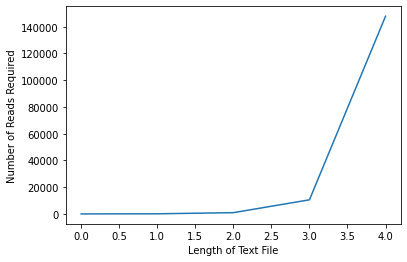

In [3]:
import matplotlib.pyplot as plt
nmreads=[]
for i in range(1,15,3):
  t=t+i*t
  _,nmread=naive(p,t)
  nmreads.append(nmread)
plt.plot(nmreads)
plt.xlabel('Length of Text File')
plt.ylabel('Number of Reads Required')

In [19]:
#Reading genome file
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa

--2021-03-27 20:56:13--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.80.89, 13.32.80.37, 13.32.80.44, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.80.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2021-03-27 20:56:14 (389 MB/s) - ‘phix.fa’ saved [5528/5528]



In [20]:
#Reading genome sequence from file
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome=readGenome('phix.fa')

In [21]:
#function to generate artificial random reads from a genome sequence
import random
def generateReads(genome,numReads,readLen):
  reads=[]
  for _ in range(numReads):
    start=random.randint(0,len(genome)-readLen)-1
    reads.append(genome[start:start+readLen])
  return reads

In [22]:
reads=generateReads(genome,100,100)

In [23]:
reads[0:2]

['GTTGGACTTGGTGGCAAGTCTGCCGCTGATAAAGGAAAGGATACTCGTGATTATCTTGCTGCTGCATTTCCTGAGCTTAATGCTTGGGAGCGTGCTGGTG',
 'TTCCATAAGCAGATGGATAACCGCATCAAGCTCTTGGAAGAGATTCTGTCTTTTCGTATGCAGGGCGTTGAGTTCGATAATGGTGATATGTATGTTGACG']

In [24]:
#count how many reads match the genome exactly
numMatched=0
for r in reads:
  matches,nmread=naive(r,genome)
  if len(matches)>0:
    numMatched+=1
print('%d/%d reads matched the genome exactly !' %(numMatched,len(reads)))
print('Number of reads are',nmread)

100/100 reads matched the genome exactly !
Number of reads are 5287


In [32]:
#Read matching using actual (real) reads
#download this file to get these actual reads
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq

--2021-03-27 21:14:28--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.32.80.61, 13.32.80.37, 13.32.80.89, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.32.80.61|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254384 (248K) [audio/mpeg]
Saving to: ‘ERR266411_1.first1000.fastq’

ERR266411_1.first10 100%[===================>] 248.42K  --.-KB/s    in 0.08s   

2021-03-27 21:14:28 (2.94 MB/s) - ‘ERR266411_1.first1000.fastq’ saved [254384/254384]



In [36]:
#Raeding FASTQ file
filename='ERR266411_1.first1000.fastq'
f=open(filename,'r')
fastq_content=f.read().split('\n')

In [37]:
fastq_content

['@ERR266411.1 HS18_09233:8:1307:10911:3848#168/1',
 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 '+',
 'B@DFEFFFGEGGGHEHGHGHGGGGHIFGFIFHICFGHGHGJGHFGHGIHEHGGHJGFEFHGHEGGHHGHIFGFGDIFGGFGGGFHGGGHGGGAGIFGGCG',
 '@ERR266411.2 HS18_09233:8:2114:9377:50721#168/1',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC',
 '+',
 "=@@CEBF@BGBG6GF1E<04C3E7E.9G=H<H:HH;HBH;G69F7,7DG((EG8A8,-5-8,?,,,AE>C,B?,,,64$AC'+'='+4'3*4+E322*'(",
 '@ERR266411.3 HS18_09233:8:2116:11778:26937#168/1',
 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 '+',
 '@@DFEEFFGFGGGFFHGHGGIGGGHIHGFIEHGHHHHFIGGEHFGHGFHGHEGHGGFGFDGHHGIHCGDFFDFDGEIGGFGHGGHGCFFGGGDGEFCFCD',
 '@ERR266411.4 HS18_09233:8:2204:14371:92031#168/1',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG',
 '+',
 'A@DFEFFFGDGGGHFHHHGHGGFGHILGF

In [25]:
#Getting Genome Reads from the fastq file
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [26]:
phix_reads,_=readFastq('ERR266411_1.first1000.fastq')

In [27]:
phix_reads

['TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC',
 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG',
 'AGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATC',
 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC',
 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG',
 'GACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCG',
 'CTGTAGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTT',
 'CTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGC

In [28]:
#count how many reads match the genome exactly
numMatched=0
for r in phix_reads:
  matches,nmreads=naive(r,genome)
  if len(matches)>0:
    numMatched+=1
print('%d/%d reads matched the genome exactly !' %(numMatched,len(phix_reads)))
print('Number of reads are',nmreads)

7/1000 reads matched the genome exactly !
Number of reads are 5287


This is a surprising result!

These are actual sequencing reads from this genome and only 7 match the genome.
One of the reason might be is the sequencing error and other one might be that the genome sequence of two individuals of same species are not exactly the same. Here the reason seems to be the first one.

What happens if we consider only a part of the read, say first 30 bases. Lets see the result for this case.

In [31]:
#count how many reads match the genome exactly
numMatched=0
for r in phix_reads:
  r=r[:30]
  matches,nmreads=naive(r,genome)
  if len(matches)>0:
    numMatched+=1
print('%d/%d reads matched the genome exactly !' %(numMatched,len(phix_reads)))
print('Number of reads are',nmreads)

459/1000 reads matched the genome exactly !
Number of reads are 5357


The matches increased but still not close to 1000. In this case the genome is double strand and the reads come from either one of them but our code checks only to one of the strand. Lets try matching it to the complement strand also. Lets see what happens to the result.

In [32]:
#Finding the complement read from original read
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A','N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [33]:
#count how many reads match the genome exactly
numMatched=0
for r in phix_reads:
  r=r[:30]
  matches,nmreads1=naive(r,genome)
  _,nmreads2=naive(reverseComplement(r),genome)
  nmreads=nmreads1+nmreads2
  matches.extend(naive(reverseComplement(r),genome))
  if len(matches)>0:
    numMatched+=1
print('%d/%d reads matched the genome exactly !' %(numMatched,len(phix_reads)))
print('Number of reads are',nmreads)

1000/1000 reads matched the genome exactly !
Number of reads are 10714


This result is meaningful!

Although not all reads match the genome due to some sequencing errors but that is expected to occur. Also once the prefix are taken into account and we take the other genome strand into account while matching we tend to get the result close to the ideal value.

**Boyer-Moore Algorithm**

Refer Chapter 2 [of this text](https://doc.lagout.org/science/0_Computer%20Science/2_Algorithms/Algorithms%20on%20Strings%2C%20Trees%2C%20and%20Sequences%20%5BGusfield%201997-05-28%5D.pdf)

In [25]:

import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [26]:
#Bad Character Rule
#T: GCTAGCTC
#P : TCAA
p='TCAA'
p_bm=BoyerMoore(p)
p_bm.bad_character_rule(2,'T') #parameters are mismatch offset (from right to left) and mimatching character in T

2

In [27]:
#Good Suffix Rule
#T: GCTAGCTC
#P: ACTA
p='ACTA'
p_bm=BoyerMoore(p)
p_bm.good_suffix_rule(0)

3

In [28]:
def boyer_moore(p, p_bm, t):
    i = 0
    occurrences = []
    nmreads=0
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
        nmreads+=1      
    return occurrences,nmreads

In [30]:
#testing boyer-moore
t = "AGCTTAGATAGC"
p = "AG"
p_bm =BoyerMoore(p)
boyer_moore(p, p_bm, t)

([0, 5, 9], 6)

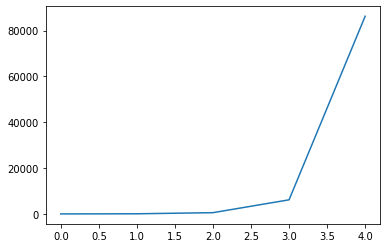

In [31]:
import matplotlib.pyplot as plt
nmreads=[]
for i in range(1,15,3):
  t=t+i*t
  p_bm =BoyerMoore(p)
  _,nmread=boyer_moore(p,p_bm,t)
  nmreads.append(nmread)
plt.plot(nmreads)

In [42]:
t[6:10]

'GATA'

In [43]:
t[14:18]

''

**Preprocessing**

Algorithm that preprocesses 'Text T' is offline. Otherwise, algorithm is online.

Examples:



1.   Naive algorithm : Online
2.   Boyer Moore : Online (Preprocessing on P not T)
3.   Web Search Engine : Offline (The text is entire world wide web and so if this is not preprocessed any search query may





**Read Alignment Problem for Genome Sequencing**

**Preprocessing Text**

In [2]:
#SubString Matching
#We will use binary search to find pattern in the text
import bisect

class Index(object):
  def __init__(self,t,k):
    #Create index table
    self.k=k
    self.index=[]
    #For each kmer add (kmer,offset) pair to index list
    for i in range(len(t)-k+1):
      self.index.append((t[i:i+k],i))
    #Sort in alphabetical order
    self.index.sort()

  def query(self,p):
    #Return index hits for first kmer of pattern
    kmer=p[:self.k]
    #Binary search to locate the offset of index hits 
    hits=[]
    i=bisect.bisect_left(self.index,(kmer,-1))
    while i < len(self.index):
      if self.index[i][0]!=kmer:
        break
      hits.append(self.index[i][1])
      i+=1
    return hits

**Matching**

In [3]:
def queryIndex(p,t,index):
  k=index.k
  offsets=[]
  nmreads=0
  for i in index.query(p):
    if p[k:]==t[i+k:i+len(p)]:
      offsets.append(i)
    nmreads+=1
  return offsets,nmreads

**Testing**

In [4]:
t = 'ACTTGGAGATCTTTGAGGCTAGGTATTCGGGATCGAAGCTCATTTCGGGGATCGATTACGATATGGTGGGTATTCGGGA'
p = 'GGTATTCGGGA'
index=Index(t,4)
hits=index.query(p)
print(queryIndex(p,t,index))

([21, 68], 2)


([21, 68], 2)


In [ ]:
t[21:21+len(p)]

'GGTATTCGGGA'